# ASH_CurrentClamp_MembranePotential

In [8]:
import pandas as pd
import matplotlib.pyplot as plt 
import os
import csv
import glob
import seaborn as sns
import numpy as np

In [9]:
# enter pathway of where files are saved 
# C:\Users\LingxinW\Box\Wang\Ephys_recording\ASH\Ephys_recording\ExtractedData\CurrentClamp_MembPot
fpath = 'C:/Users/LingxinW/Box/Wang/Ephys_recording/ASH/Ephys_recording/ExtractedData/CurrentClamp_membPot'
all_files = glob.glob(fpath + "/*.csv")

In [10]:
pwd

'C:\\Users\\LingxinW\\Google Drive\\PythonScripts\\EphysAnalysis'

In [11]:
# put all individual csv dataframe files into one dataframe file df
analysis = pd.DataFrame()
for x in all_files:
    df = pd.read_csv(x)
    #f['t_half_act_on'][0]= ''
    analysis=pd.concat([analysis,df])
analysis.head(20)

,worm_strain,cell_ID,stim_um,MembranePotential,group_number
0,HA1134,ASHLW020,-2,-54.796131,3
1,HA1134,ASHLW020,0,-42.814820,3
2,HA1134,ASHLW020,2,-23.685346,3
3,HA1134,ASHLW020,4,-15.080019,3
4,HA1134,ASHLW020,6,-10.072585,3
5,HA1134,ASHLW020,8,-5.337725,3
6,HA1134,ASHLW020,10,-0.549903,3
7,HA1134,ASHLW020,12,2.635915,3
8,HA1134,ASHLW020,14,5.297075,3
0,HA1134,ASHLW021,-2,-51.363530,5


No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'Injected Current (pA)')

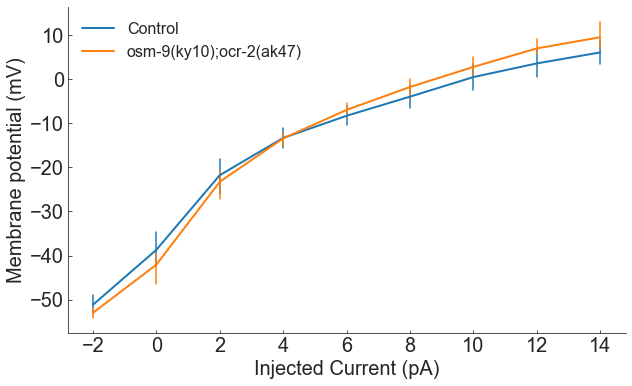

In [12]:
# plot the figures using seaborn 
# plot max peak amplitude

sns.set_style('white')
sns.set_style('ticks', {'xtick.direction': 'in', 'ytick.direction': 'in'})
#sns.despine(offset=2, trim=True, top = False, right = False)
plt.rcParams.update({'font.size': 20})
plt.rcParams['svg.fonttype'] = 'none'

#%% plotting specific data from dataframe
#order = ['TU2769', 'GN932']
#xticklabels = ['WT', 'mutant']


plt.figure(figsize=(10,6))
plt.legend(loc='upper right')
sns.despine(right=True) # remove axis spines of right and up

fig = sns.lineplot(x='stim_um', y='MembranePotential', data=analysis, hue = 'worm_strain', err_style ='bars', lw=2)
handles, labels = fig.get_legend_handles_labels() # and next line code to remove legend title
plt.legend(handles=handles[1:], labels=labels[1:])#

# move x and y axis to 0,0 intersection
#fig.spines['left'].set_position(('data', 0))
#fig.spines['bottom'].set_position(('data', 0))
plt.legend(['Control', 'osm-9(ky10);ocr-2(ak47)'], frameon = False, prop={'size': 16}) # change figure label from strain name to genotype
plt.ylabel('Membrane potential (mV)')
plt.xlabel('Injected Current (pA)')
